In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
import pickle
from sklearn.linear_model import LinearRegression

In [2]:
dpi = 200

plt.rcParams.update({
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'axes.labelsize': 28,
    'figure.dpi': dpi,
    'axes.grid': True,
    'grid.linestyle': '--',
    'figure.figsize':(16,10),
    'axes.titlesize':24
})

# SI-Fig1

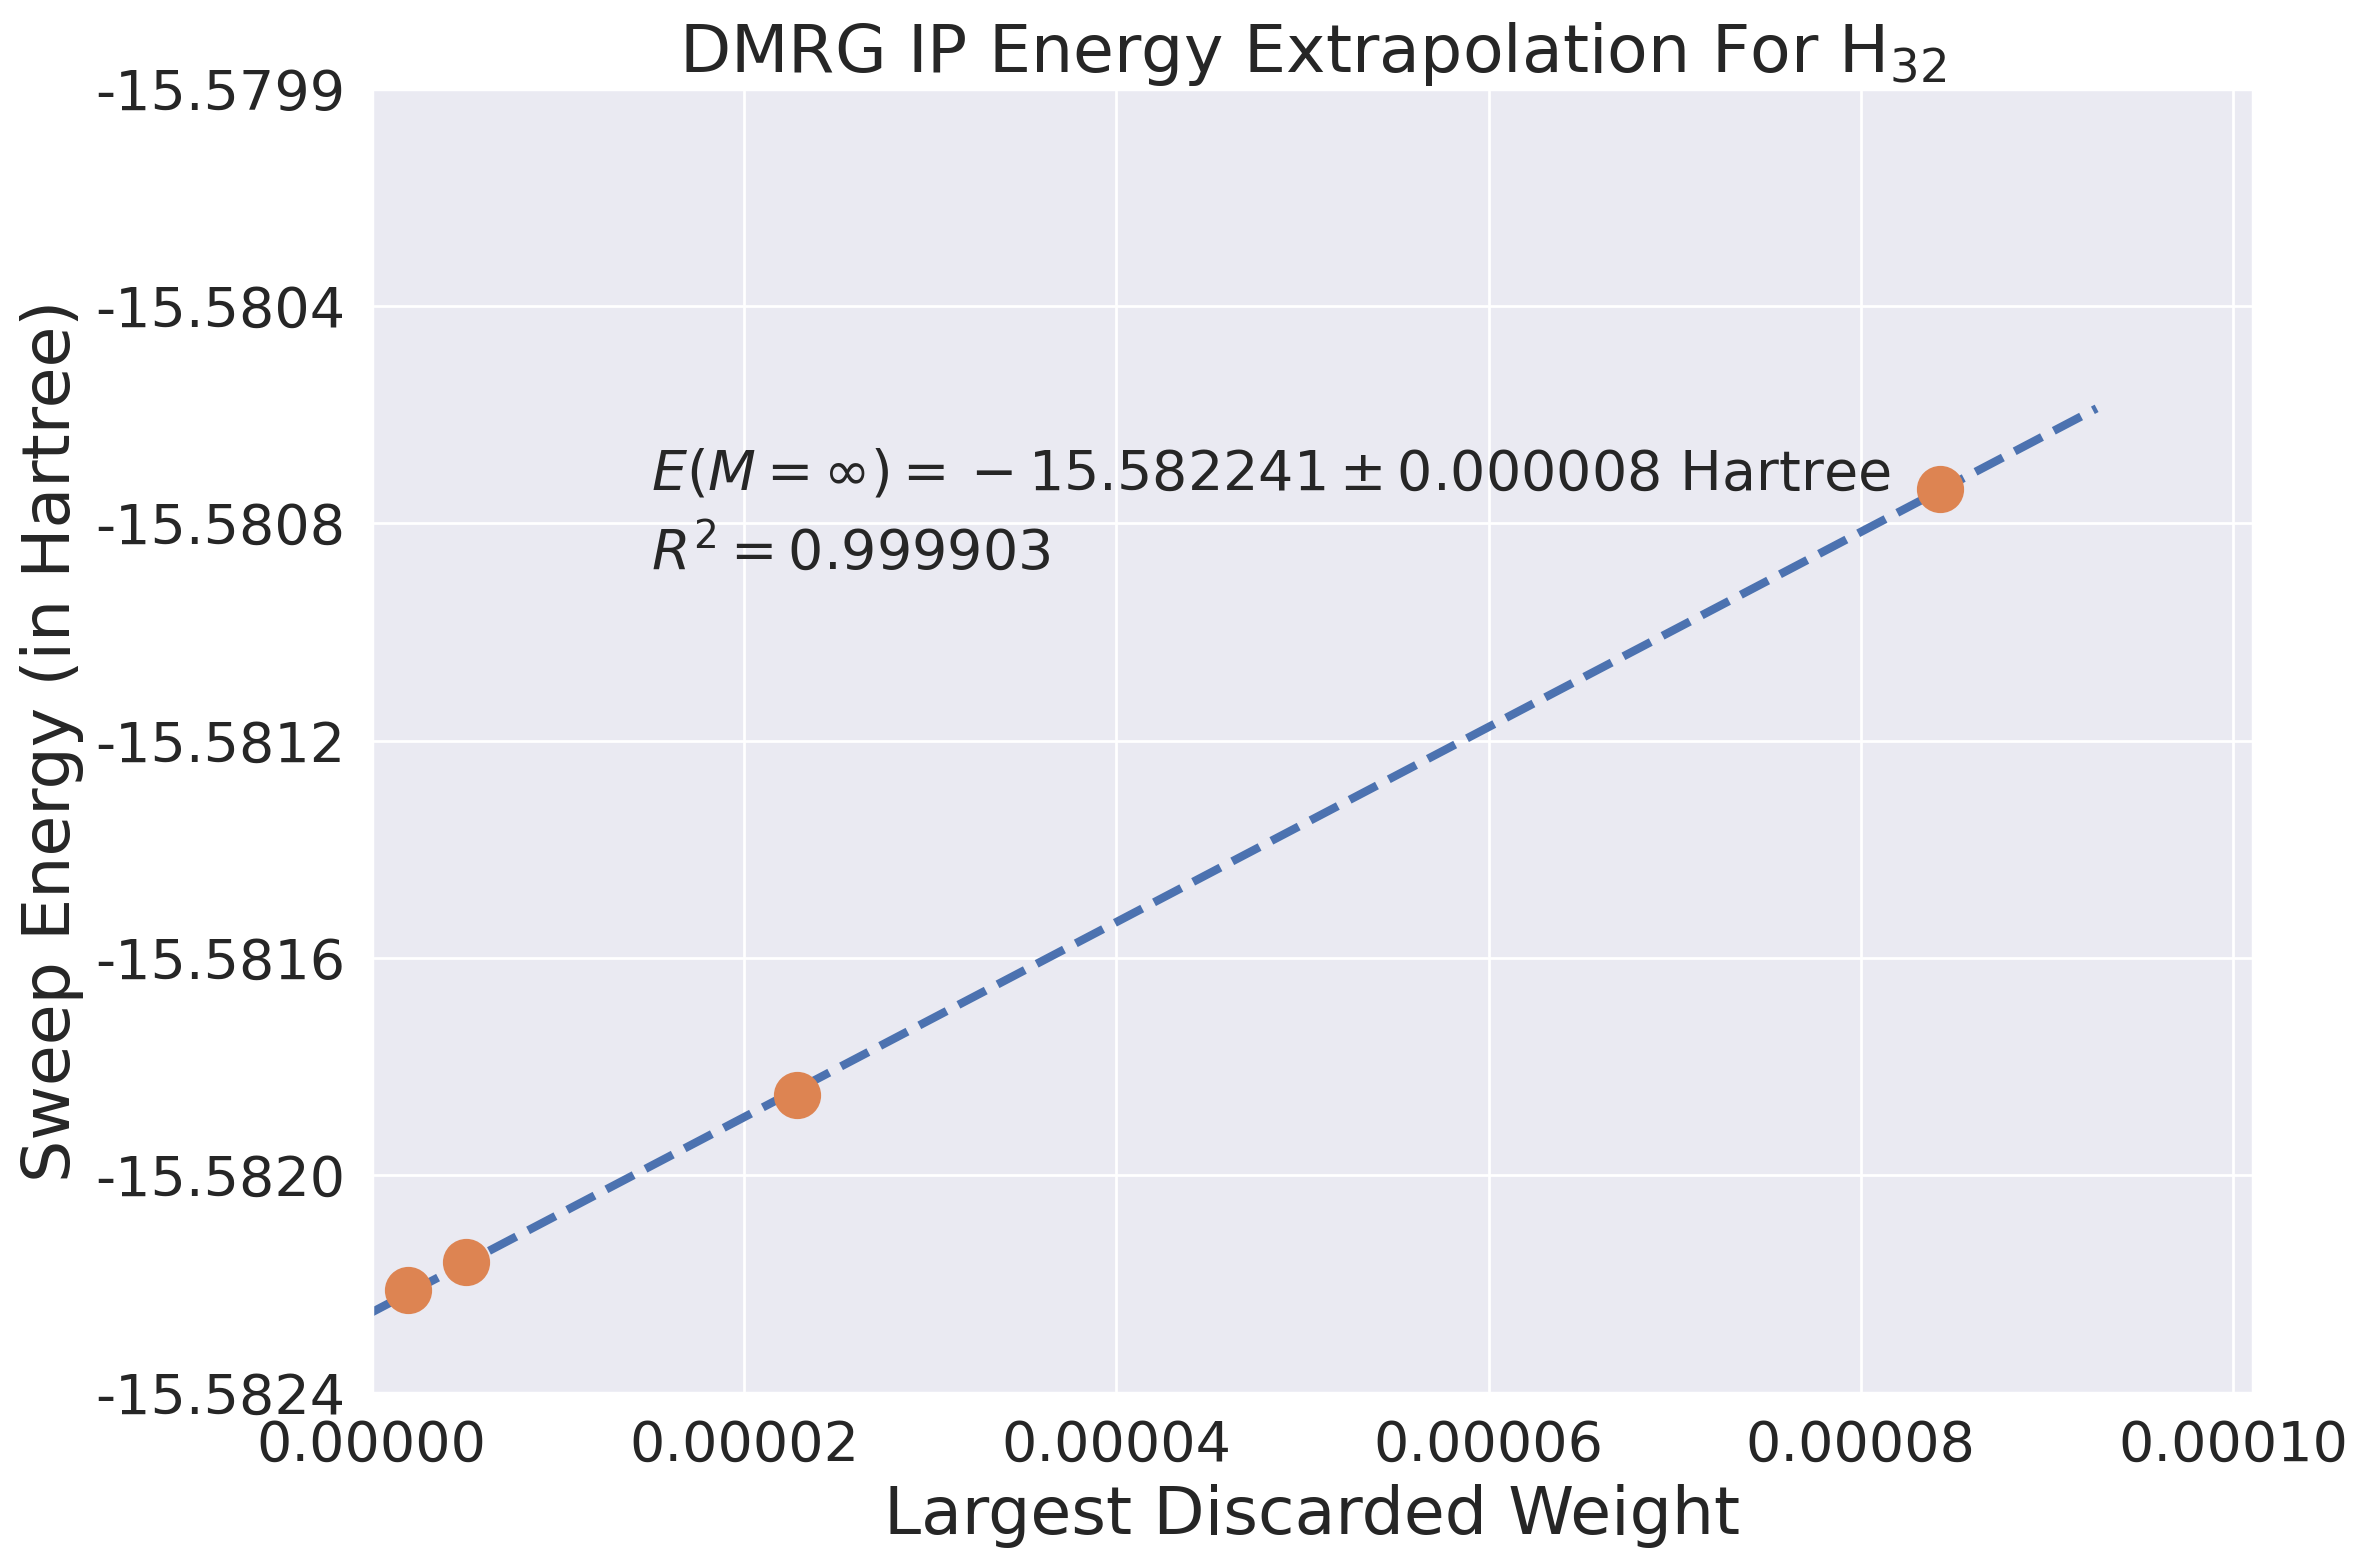

In [3]:
# See: https://block2.readthedocs.io/en/latest/user/basic.html
sns.set()
fname = './dmrg-IP.out'

plt.figure(figsize=(12, 8), dpi=dpi)

with open(fname, 'r') as f:
    dmrgdata = f.readlines()

eners, dws = [], []
for line in dmrgdata:
    if "DW" in line:
        eners.append(float(line.split()[7]))
        dws.append(float(line.split()[-1]))

eners, dws = eners[3::4], dws[3::4]

reg = scipy.stats.linregress(dws, eners)
x_reg = np.array([0, max(dws)+max(dws)/10])
emin, emax = min(eners), max(eners)
de = emax - emin

yticks = np.linspace(reg.intercept - de * 0.1, emax + de * 0.5, num=7)
plt.yticks(yticks, [f"{ytick:.4f}" for ytick in yticks])

plt.plot(x_reg, reg.intercept + reg.slope * x_reg, '--', linewidth=3)
plt.plot(dws, eners, 'o', markersize=16)
plt.text(0.000015, emax, "$E(M=\\infty) = %.6f \pm %.6f \\mathrm{\\ Hartree}$" %
    (reg.intercept, abs(reg.intercept - emin) / 5), fontsize=20)
plt.text(0.000015, emax - de * 0.1, "$R^2 = %.6f$" % (reg.rvalue ** 2), fontsize=20)

plt.xlim((0, max(dws)+max(dws)/5))
plt.ylim((reg.intercept - de * 0.1, emax + de * 0.5))
plt.xlabel("Largest Discarded Weight", fontsize=24)
plt.ylabel("Sweep Energy (in Hartree)", fontsize=24)
plt.subplots_adjust(left=0.16, bottom=0.1, right=0.95, top=0.95)
plt.title("DMRG IP Energy Extrapolation For H$_{32}$", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("H32DMRGIPEnergyExtrapolation.png", dpi=dpi)

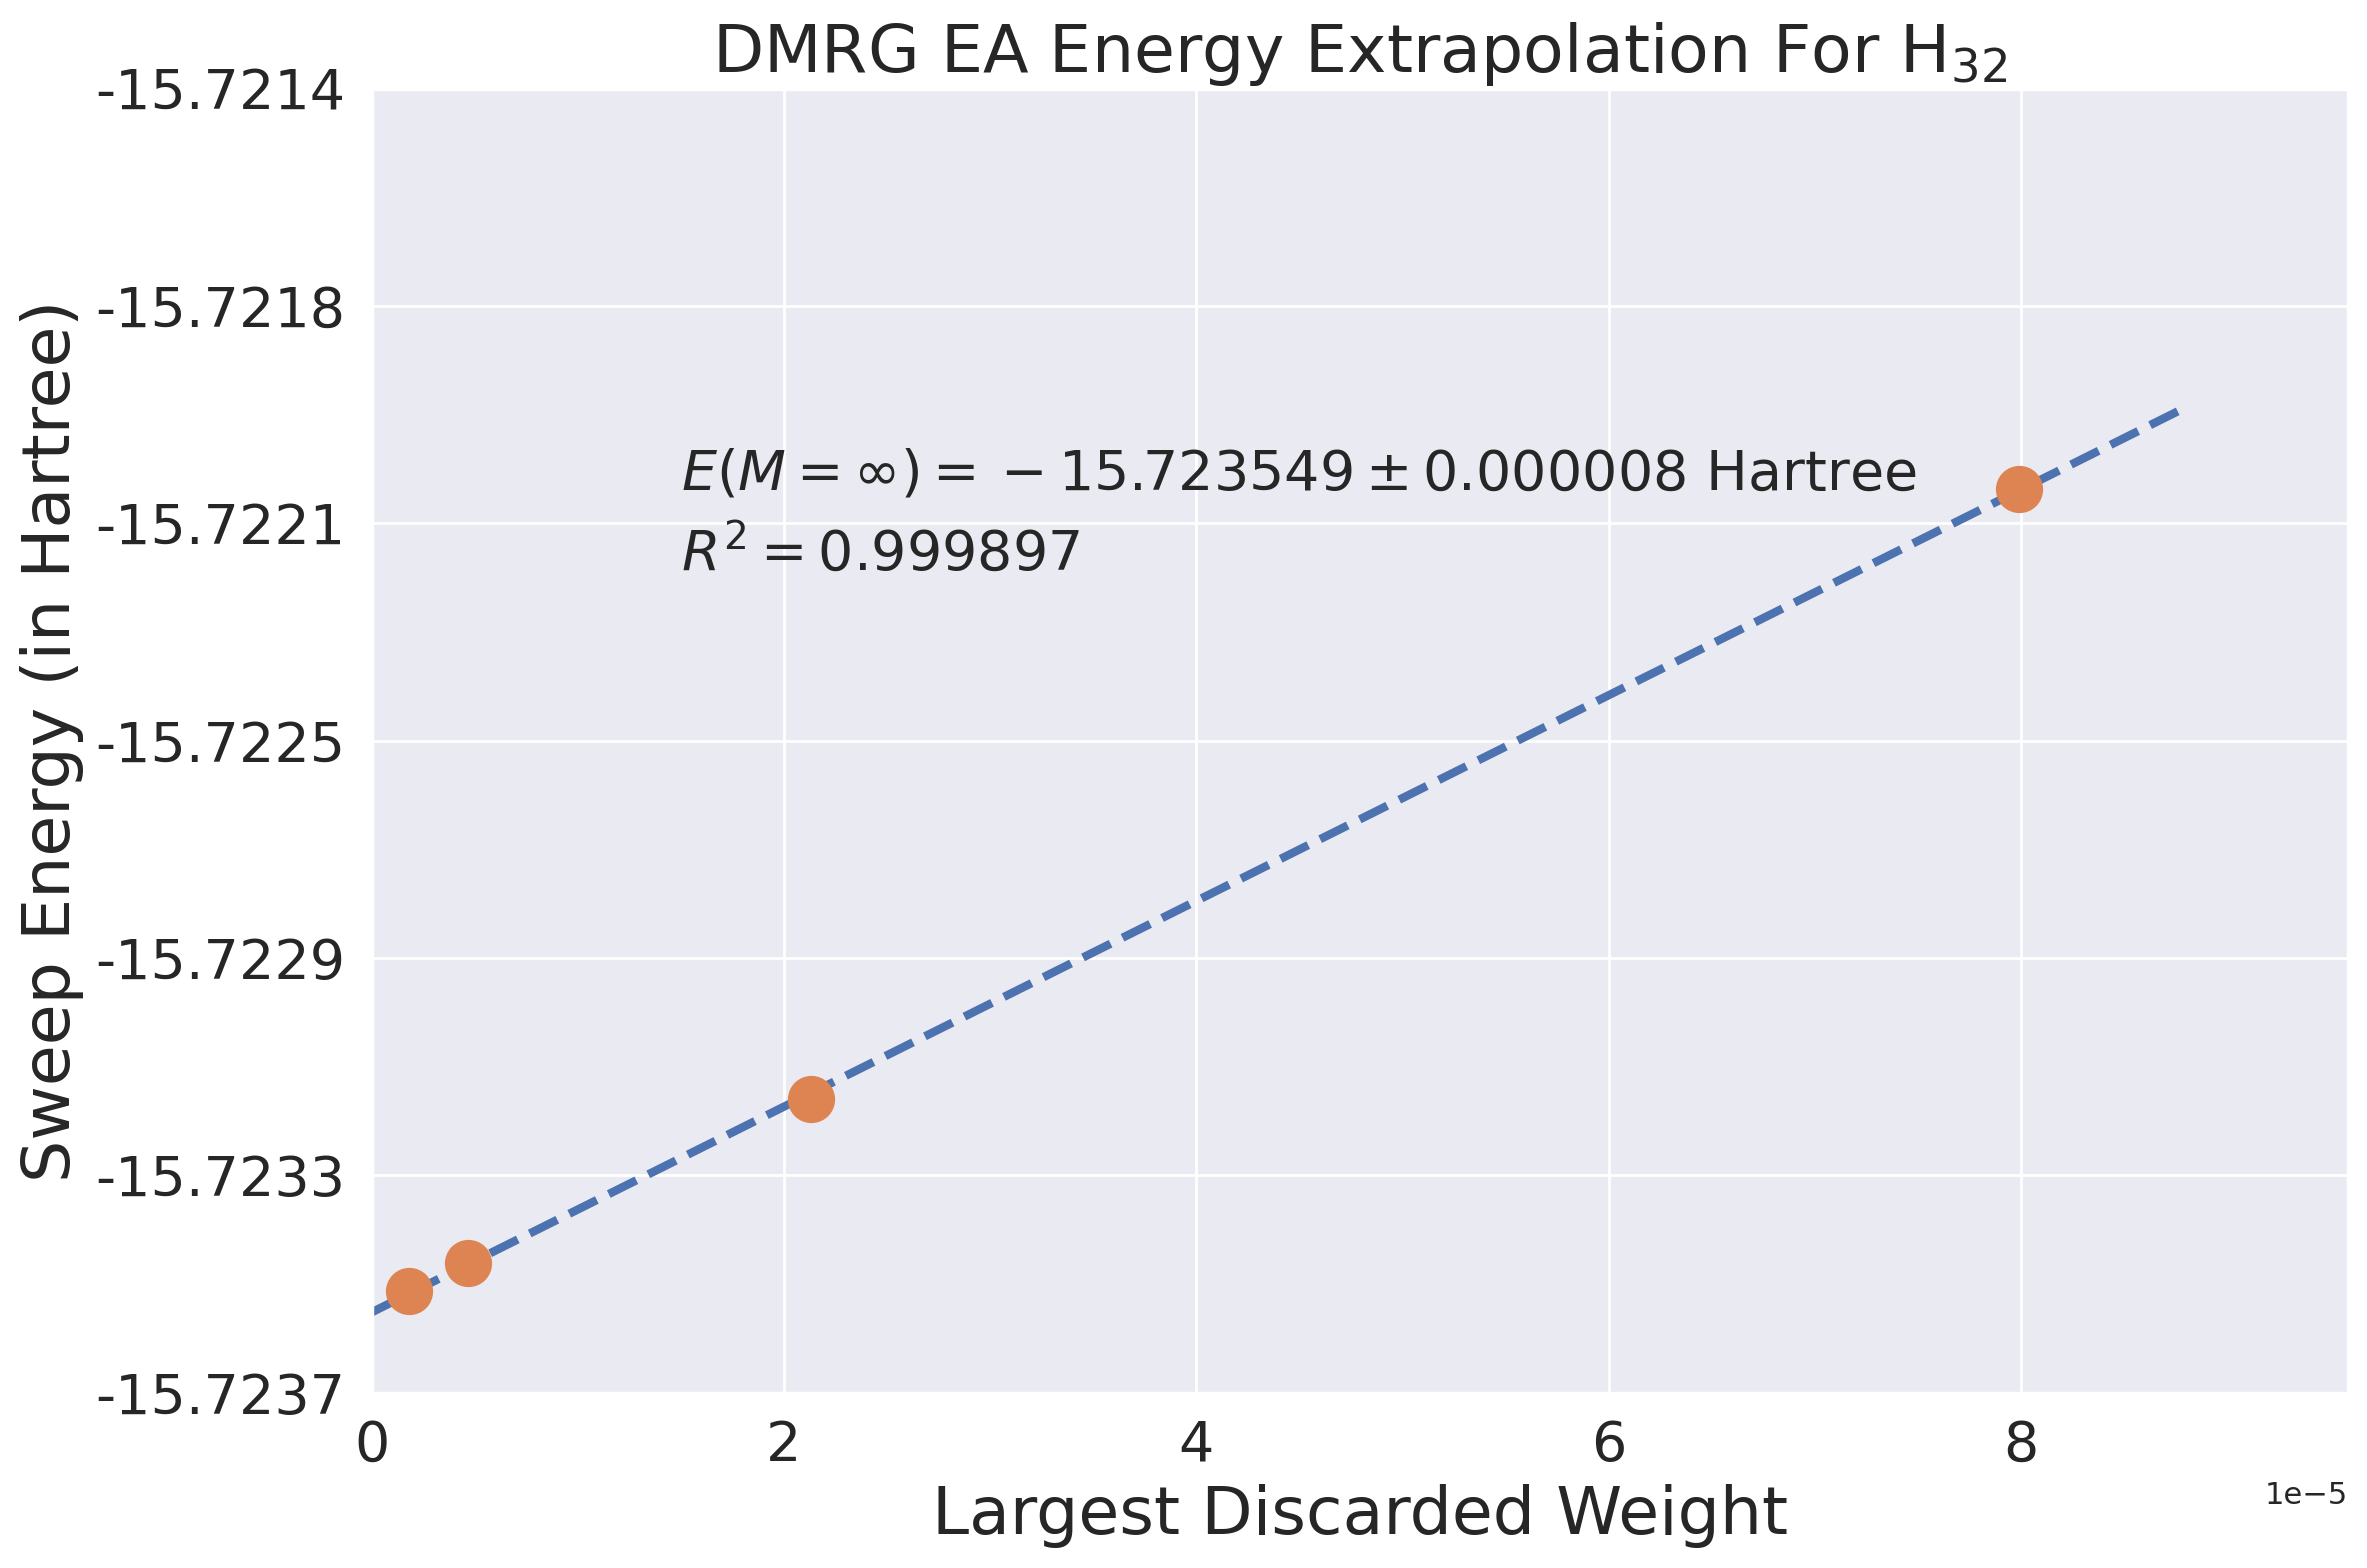

In [4]:
fname = './dmrg-EA.out'

plt.figure(figsize=(12, 8), dpi=dpi)

with open(fname, 'r') as f:
    dmrgdata = f.readlines()

eners, dws = [], []
for line in dmrgdata:
    if "DW" in line:
        eners.append(float(line.split()[7]))
        dws.append(float(line.split()[-1]))

eners, dws = eners[3::4], dws[3::4]

reg = scipy.stats.linregress(dws, eners)
x_reg = np.array([0, max(dws)+max(dws)/10])
emin, emax = min(eners), max(eners)
de = emax - emin

yticks = np.linspace(reg.intercept - de * 0.1, emax + de * 0.5, num=7)
plt.yticks(yticks, [f"{ytick:.4f}" for ytick in yticks])

plt.plot(x_reg, reg.intercept + reg.slope * x_reg, '--', linewidth=3)
plt.plot(dws, eners, 'o',  markersize=16)
plt.text(0.000015, emax, "$E(M=\\infty) = %.6f \pm %.6f \\mathrm{\\ Hartree}$" %
    (reg.intercept, abs(reg.intercept - emin) / 5), fontsize=20)
plt.text(0.000015, emax - de * 0.1, "$R^2 = %.6f$" % (reg.rvalue ** 2), fontsize=20)

plt.xlim((0, max(dws)+max(dws)/5))
plt.ylim((reg.intercept - de * 0.1, emax + de * 0.5))
plt.xlabel("Largest Discarded Weight", fontsize=24)
plt.ylabel("Sweep Energy (in Hartree)", fontsize=24)
plt.subplots_adjust(left=0.16, bottom=0.1, right=0.95, top=0.95)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("DMRG EA Energy Extrapolation For H$_{32}$", fontsize=24)
plt.tight_layout()
plt.savefig("H32DMRGEAEnergyExtrapolation.png", dpi=dpi)
